# Data and Visualization
Reference :  
    1. PCA : https://datascienceschool.net/view-notebook/f10aad8a34a4489697933f77c5d58e3a/  
    2. UMAP : https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Draw_scatter Function

In [2]:
from matplotlib import cm

## Function to draw UMAP plot conveniently
def draw_scatter(pnt_2d, y, Title = None):
    C_map = cm.get_cmap('Spectral', 256)  # 'viridis'
    
    plt.figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')

    ## Under the original label
    plt.subplot(2,2,1)
    scatters = []      
    z = y
    y_label = list(set(z))
    nl = len(y_label)-1
    for k, lbl in enumerate(y_label):
        n = y_label[k]
        scatters.append(plt.scatter(pnt_2d[z==n, 0], pnt_2d[z==n, 1], \
                                    color=C_map(k/nl), # marker=markers[k], \
                                    label=lbl, s = 6))

    plt.legend( tuple(scatters),
                tuple(y_label),
                scatterpoints=1,
                loc='upper right',
                ncol=1, # len(scatters),                                                                                                 
                fontsize=10)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    if Title is not None: 
        plt.title(Title, fontsize=11)
    plt.grid()


# DataLoad

In [3]:
iris = load_iris()
print(iris.data.shape)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


# Load Data => DataFrame Formatting

In [4]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))# 숫자를 string으로 다시 맵핑

In [5]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## (3) Pair-wise scatter plot (Package : Seaborn)

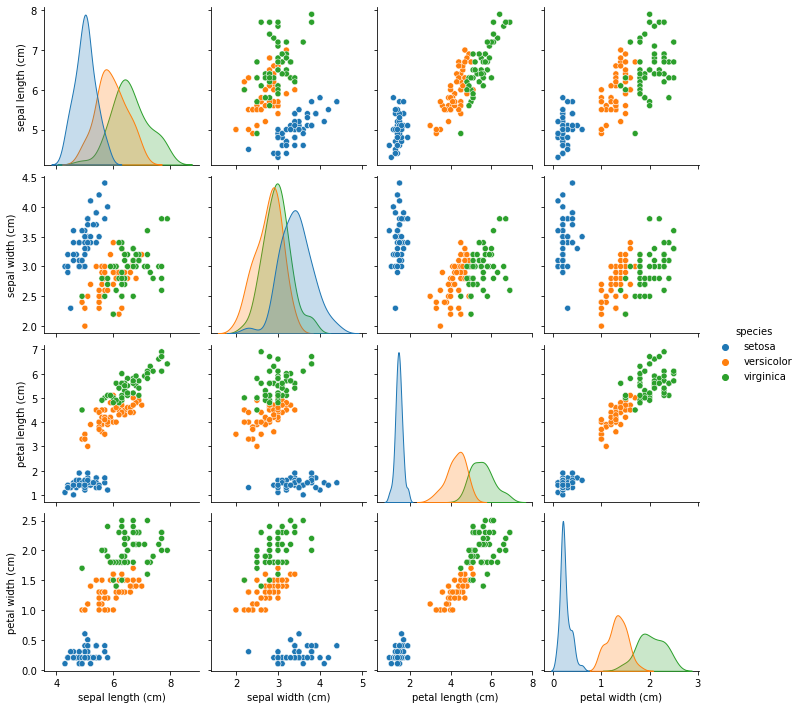

In [6]:
sb.pairplot(iris_df, hue='species');

## (4) After Apply PCA ,reduce dimension Visualization

(150, 4) (150, 2)


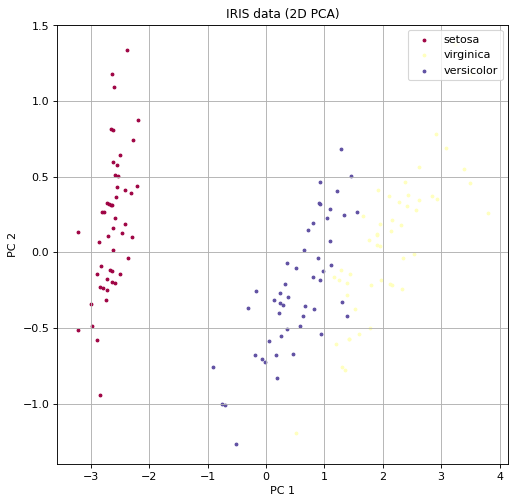

In [7]:
pca_2d = PCA(n_components=2)
X = iris_df.iloc[:,:4]
X_2d = pca_2d.fit_transform(X)
print(X.shape, X_2d.shape)

y = iris_df.loc[:,'species']

draw_scatter( X_2d, y, 'IRIS data (2D PCA)' )

In [8]:
pca_2d.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

## X_2d = pca_2d.components_ * X

# 2. Gene expression Dataset

In [9]:
file_name = 'cancer_gene_exp.csv'
df = pd.read_csv(file_name, index_col=0)
print("Data shape: ",end='')
print(df.shape)

df.head()

Data shape: (1655, 101)


,Tumor_type,PSMB11|122706,PAX1|5075,DNTT|1791,C14orf23|387978,CCL25|6370,IGLL1|3543,ARL5C|390790,ST8SIA3|51046,RAG2|5897,...,C10orf129|142827,SFTPA1|653509,TCERG1L|256536,LOC730811|730811,TFAP2B|7021,PCSK2|5126,KCNQ2|3785,C7orf16|10842,PABPC1L2B|645974,GALR1|2587
TCGA-2W-A8YY,CESC,0.0,4.37,0.00,0.78,0.44,0.00,0.00,1.28,0.00,...,0.00,0.00,1.05,0.0,2.67,1.05,1.05,0.44,0.44,0.00
TCGA-4J-AA1J,CESC,0.0,0.00,0.89,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.51,0.00,0.0,1.83,0.89,0.00,0.00,0.00,0.89
TCGA-BI-A0VR,CESC,0.0,0.00,0.00,0.00,2.18,2.30,0.00,0.00,0.00,...,0.48,0.48,0.00,0.0,3.08,0.48,0.00,0.00,0.00,0.00
TCGA-BI-A0VS,CESC,0.0,0.00,0.00,0.00,0.43,1.62,0.43,0.00,0.76,...,0.00,2.04,1.25,0.0,1.44,2.04,0.43,0.00,0.00,0.43
TCGA-BI-A20A,CESC,0.0,0.00,0.73,0.00,1.73,0.41,0.00,0.00,0.00,...,0.00,0.00,0.41,0.0,0.41,0.00,0.00,0.00,0.00,0.00


In [10]:
X = df.iloc[:,1:]
y = df.Tumor_type
target_names = list(set(y))
print('Tumor types: ', target_names)

Tumor types:  ['LUAD', 'THYM', 'ESCA', 'UCEC', 'SARC', 'PCPG', 'COAD', 'THCA', 'CESC']


## (2) After Apply PCA, reduce dimension

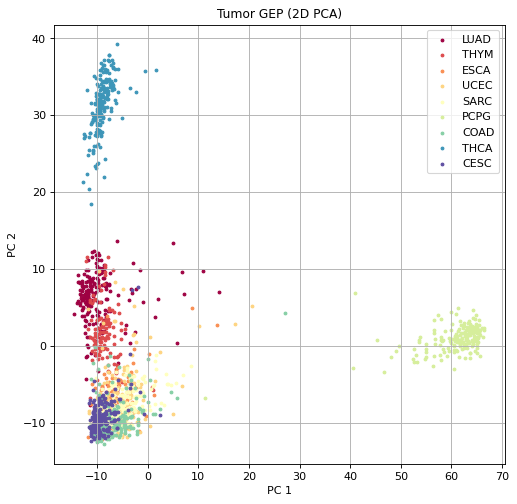

In [11]:
X_2d_pca = pca_2d.fit_transform(X)

draw_scatter( X_2d_pca, y, 'Tumor GEP (2D PCA)' )

In [12]:
pca_2d.components_.shape

(2, 100)

## Use tSNE(non-linear reduce dimension) DataVisualization

(1655, 100) (1655, 2)


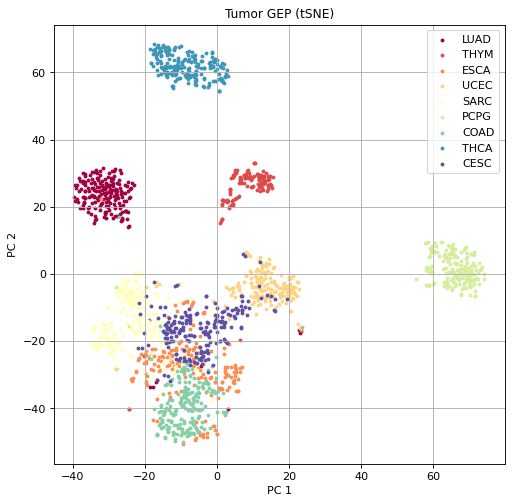

In [13]:
X_2d_tsne = TSNE(learning_rate=300, init='pca').fit_transform(X)
print(X.shape, X_2d_tsne.shape)

draw_scatter( X_2d_tsne, y, 'Tumor GEP (tSNE)' )

# 3. Digits Data

In [14]:
digits = load_digits()
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)
digits.target_names

(1797, 64)
(1797, 8, 8)
(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

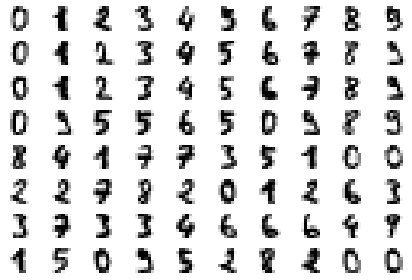

In [15]:
fig, ax_array = plt.subplots(8, 10)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
    
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=1, w_pad=1)

In [16]:
X = digits.data 
y = digits.target
target_names = list(set(y))

print('Target names: ', target_names)

Target names:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## (3) PCA Visualization

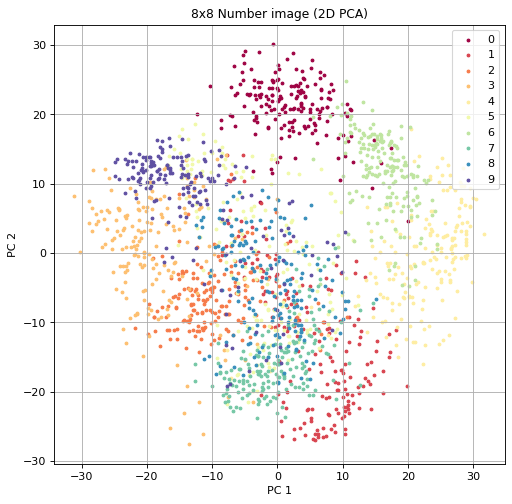

In [17]:
pca_2d = PCA(n_components=2)

X_2d_pca = pca_2d.fit_transform(X)

draw_scatter( X_2d_pca, y, '8x8 Number image (2D PCA)' )

## (4) UMAP Visualization